In [2]:
# Lab 10 MNIST and softmax
import torch
import torch.nn as nn
import torchvision.datasets as dsets
import torchvision.transforms as transforms
import torch.optim as optim
import random

In [3]:
model1 =  nn.Conv1d(1, 1, kernel_size=3, padding=1, bias=False)
model2 =  nn.Conv1d(1, 1, kernel_size=3, padding=1, bias=False)

In [4]:
model1.weight, model2.weight

(Parameter containing:
 tensor([[[ 0.2515, -0.1454,  0.2824]]], requires_grad=True),
 Parameter containing:
 tensor([[[ 0.3586, -0.4089,  0.1462]]], requires_grad=True))

In [5]:
lr1 = 0.01
lr2 = 0.02

lr = [lr1, lr2]

In [9]:
from itertools import chain

# params = [model1.parameters(), model2.parameters()]
optimizer1 = optim.Adam(model1.parameters(), lr=lr1)
optimizer2 = optim.Adam(model2.parameters(), lr=lr2)
mse = nn.MSELoss()


x1 = torch.ones(444).reshape(1,1,-1)
y = torch.ones(444)

In [10]:


optimizer1.zero_grad()
optimizer2.zero_grad()

y_ = model1(x1)
y_ = model2(y_).reshape(-1)

loss = mse(y_, y)

loss.backward()
optimizer1.step()
optimizer2.step()

In [11]:
model1.weight, model2.weight

(Parameter containing:
 tensor([[[ 0.2615, -0.1354,  0.2924]]], requires_grad=True),
 Parameter containing:
 tensor([[[ 0.3786, -0.3889,  0.1662]]], requires_grad=True))

In [136]:
import matplotlib.pyplot as plt

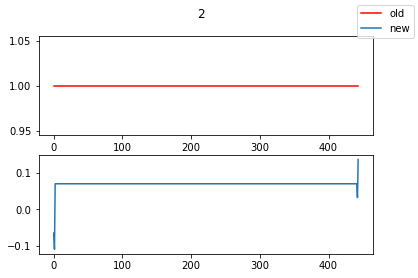

In [154]:
fig = plt.figure()
fig.suptitle('2')
ax1 = fig.add_subplot(2,1,1)
ax1.plot(y, c='red', label='old')
ax2 = fig.add_subplot(2,1,2)
ax2.plot(y_.detach().numpy(),label='new')
